In [131]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import sklearn


In [132]:
uploaded = files.upload()
car_data = pd.read_csv('car_data.csv')

Saving car_data.csv to car_data (3).csv


In [133]:
print("Dataset Overview:")
print(car_data.head())
print("\nDataset Info:")
print(car_data.info())

Dataset Overview:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    fl

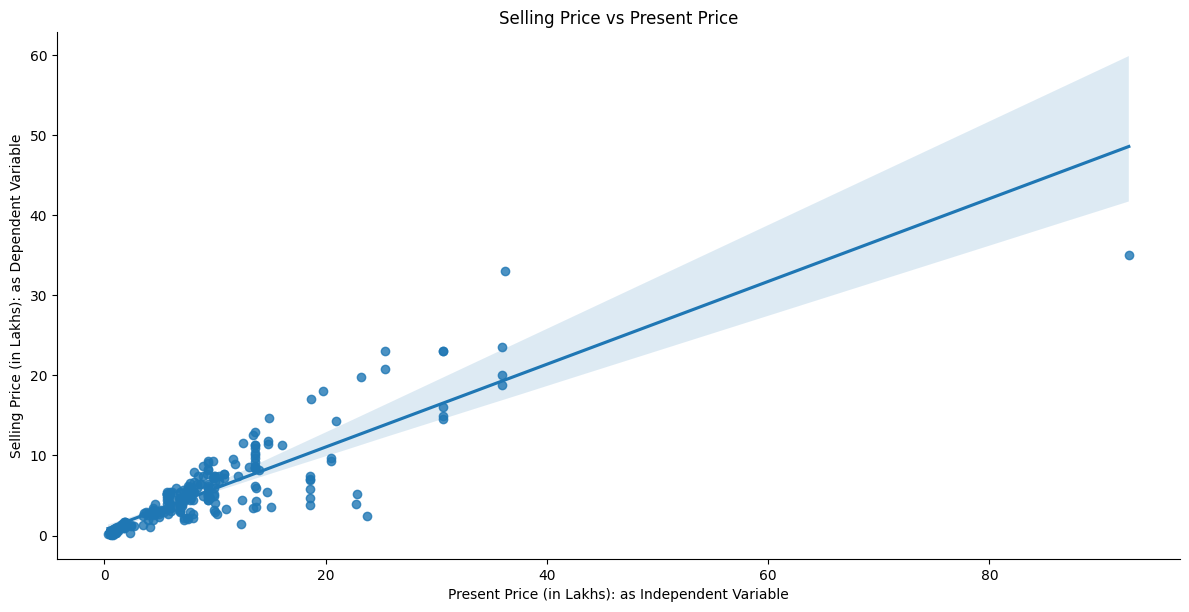

In [134]:
sns.lmplot(x='Present_Price', y='Selling_Price', data=car_data, aspect=2, height=6)
plt.xlabel('Present Price (in Lakhs): as Independent Variable')
plt.ylabel('Selling Price (in Lakhs): as Dependent Variable')
plt.title('Selling Price vs Present Price')
plt.show()

In [135]:
print("\nDescriptive Statistics:")
print(car_data.describe())


Descriptive Statistics:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


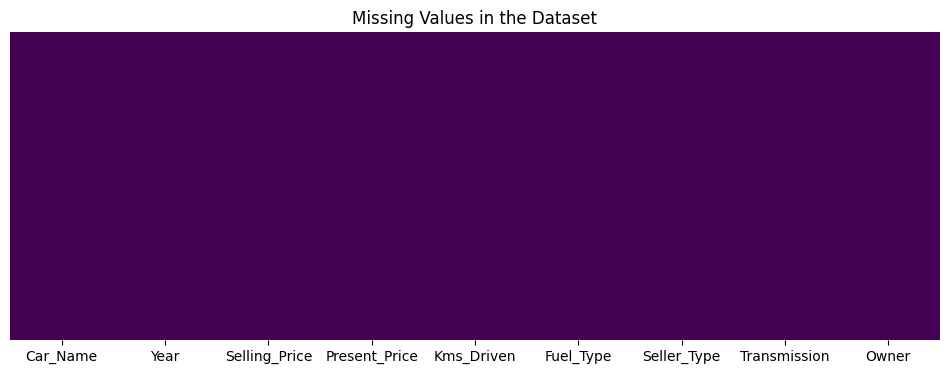

In [136]:
plt.figure(figsize=(12, 4))
sns.heatmap(car_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()

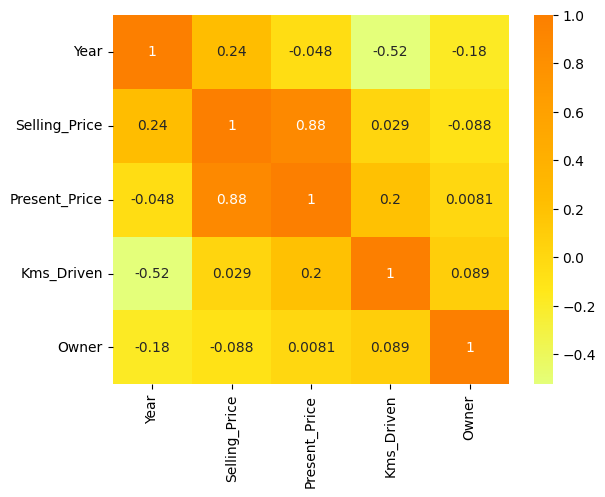

In [137]:
corr = car_data.select_dtypes('number').corr()
sns.heatmap(corr, cmap = 'Wistia',annot=True);


<ipython-input-140-a40141823139>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Owner'],bins=50,color='r',ax=ax)
<ipython-input-140-a40141823139>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(filtered_owner),bins=40,color='b',ax=ax)


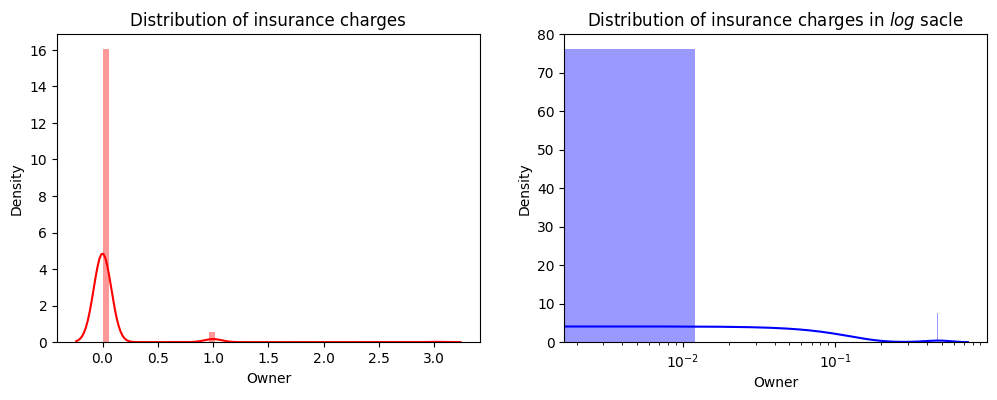

In [140]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
#sns.distplot(df['charges'],bins=50,color='r',ax=ax)
sns.distplot(car_data['Owner'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
#sns.distplot(np.log10(car_data['charges']),bins=40,color='b',ax=ax)
# Filter out 0 values before applying log10
filtered_owner = car_data['Owner'][car_data['Owner'] > 0]
sns.distplot(np.log10(filtered_owner),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

<ipython-input-141-8a0dee3e402e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Fuel_Type', y='Selling_Price', data=car_data, palette='Wistia', ax=ax)
<ipython-input-141-8a0dee3e402e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Seller_Type', y='Selling_Price', data=car_data, palette='magma', ax=ax)


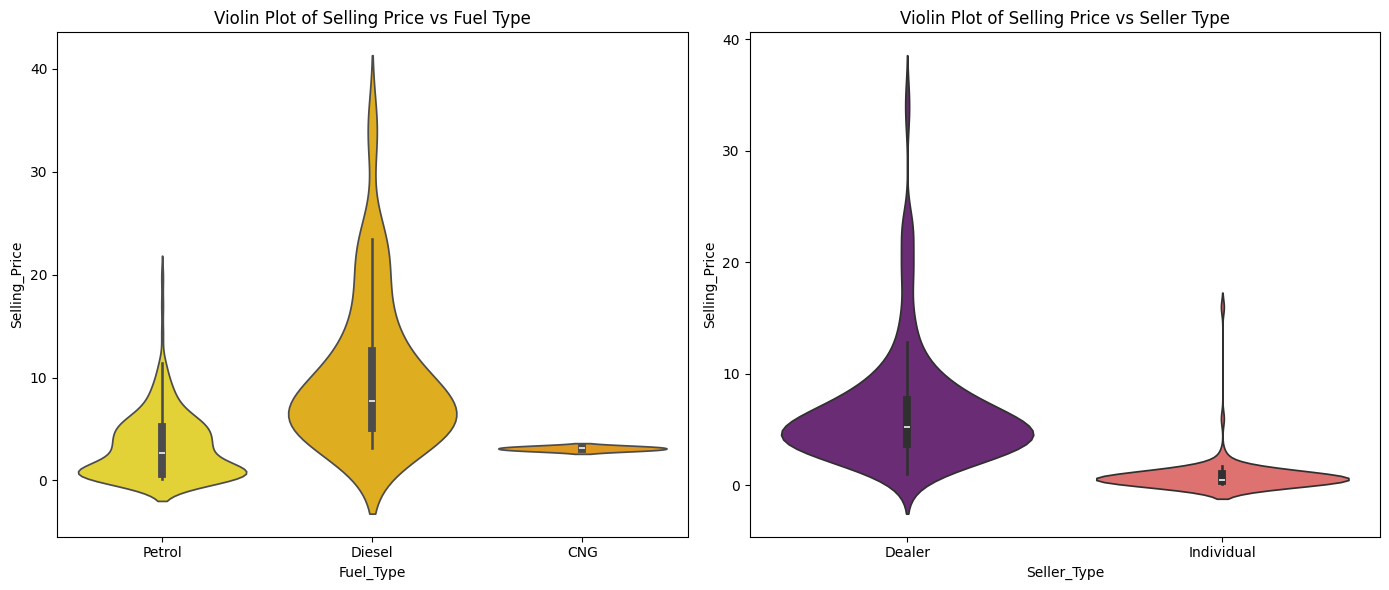

In [141]:
f = plt.figure(figsize=(14, 6))

ax = f.add_subplot(121)
sns.violinplot(x='Fuel_Type', y='Selling_Price', data=car_data, palette='Wistia', ax=ax)
ax.set_title('Violin Plot of Selling Price vs Fuel Type')

ax = f.add_subplot(122)
sns.violinplot(x='Seller_Type', y='Selling_Price', data=car_data, palette='magma', ax=ax)
ax.set_title('Violin Plot of Selling Price vs Seller Type')

plt.tight_layout()
plt.show()

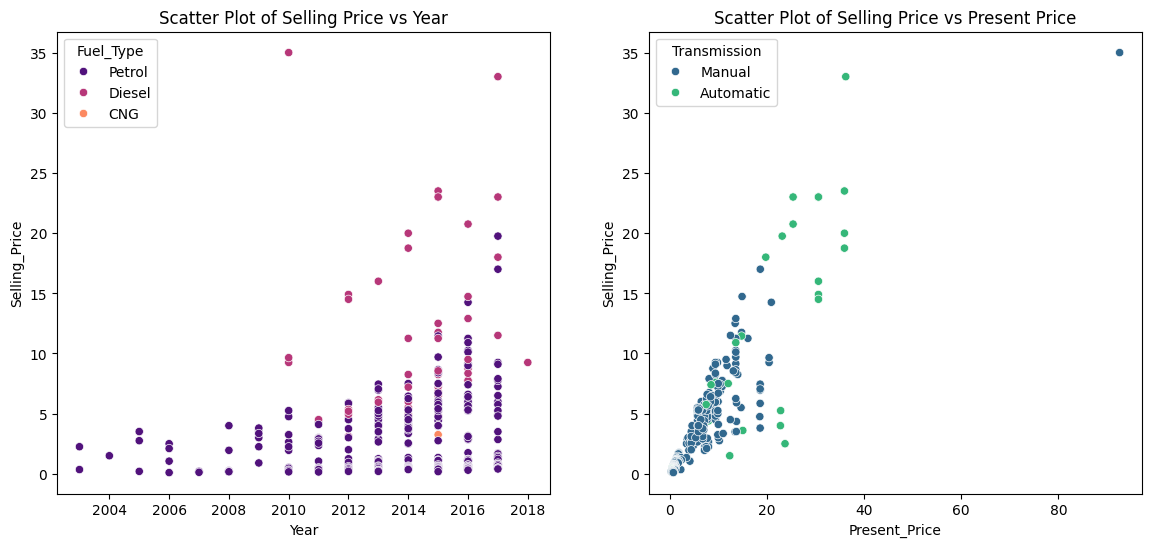

In [142]:

f = plt.figure(figsize=(14, 6))

ax = f.add_subplot(121)
sns.scatterplot(x='Year', y='Selling_Price', hue='Fuel_Type', data=car_data, palette='magma', ax=ax)
ax.set_title('Scatter Plot of Selling Price vs Year')

ax = f.add_subplot(122)
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Transmission', data=car_data, palette='viridis', ax=ax)
ax.set_title('Scatter Plot of Selling Price vs Present Price')

plt.show()

In [143]:
# Verify the dummy variable encoding process
print("Columns in the original data frame:\n", car_data.columns.values)
print("\nNumber of rows and columns in the original dataset:", car_data.shape)
print("\nColumns in the data frame after encoding dummy variables:\n", df_encoded.columns.values)
print("\nNumber of rows and columns in the encoded dataset:", df_encoded.shape)


Columns in the original data frame:
 ['Car_Name' 'Year' 'Selling_Price' 'Present_Price' 'Kms_Driven'
 'Fuel_Type' 'Seller_Type' 'Transmission' 'Owner']

Number of rows and columns in the original dataset: (301, 9)

Columns in the data frame after encoding dummy variables:
 ['Car_Name' 'Year' 'Selling_Price' 'Present_Price' 'Kms_Driven' 'Owner'
 'OHE_Diesel' 'OHE_Petrol' 'OHE_Individual' 'OHE_Manual']

Number of rows and columns in the encoded dataset: (301, 10)


In [144]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
df_encode = pd.get_dummies(
    data=car_data,
    prefix='OHE',
    prefix_sep='_',
    columns=categorical_columns,
    drop_first=True,
    dtype='int8'
)

df_encode.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,OHE_Diesel,OHE_Petrol,OHE_Individual,OHE_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [145]:

y_bc,lam, ci= boxcox(df_encode['Selling_Price'],alpha=0.05)
ci,lam

((0.09964114320450769, 0.27833993569384735), 0.18905841221079797)

In [146]:

X = df_encode.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df_encode['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))
print(theta)


# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

[-7.37550001e+02  3.67599271e-01  4.01515935e-01 -5.19137956e-06
 -1.06113143e+00  2.31376937e+00  7.25371563e-01 -1.24534095e+00
 -1.68112911e+00]


In [157]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.merge(pd.Series(sk_theta, name='Sklearn_theta'), left_index=True, right_index=True, suffixes=('', '_sklearn'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta,Sklearn_theta_sklearn,Sklearn_theta_sklearn
0,theta_0,intersect:x_0=1,-737.550001,-737.550001,-737.550001,-737.550001
1,theta_1,Year,0.367599,0.367599,0.367599,0.367599
2,theta_2,Present_Price,0.401516,0.401516,0.401516,0.401516
3,theta_3,Kms_Driven,-0.000005,-0.000005,-0.000005,-0.000005
4,theta_4,Owner,-1.061131,-1.061131,-1.061131,-1.061131
5,theta_5,OHE_Diesel,2.313769,2.313769,2.313769,2.313769
6,theta_6,OHE_Petrol,0.725372,0.725372,0.725372,0.725372
7,theta_7,OHE_Individual,-1.245341,-1.245341,-1.245341,-1.245341
8,theta_8,OHE_Manual,-1.681129,-1.681129,-1.681129,-1.681129


In [158]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  4.629339311328317
R square obtain for normal equation method is : 0.8596676262797139


In [159]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE

J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  4.629339311213867
R square obtain for scikit learn library is : 0.8596676262831834


<ipython-input-160-58e1fbc25163>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


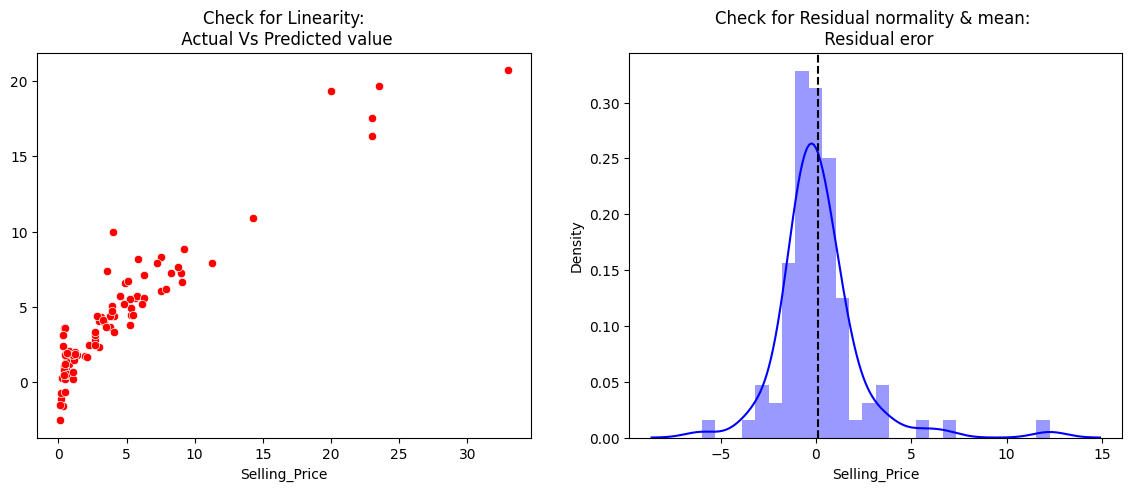

In [160]:
# Check for Linearity ; X_test[:,0], X_test[:,1]
#sns.scatterplot(data=df)
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
#sns.distplot((x=y_test, y= y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

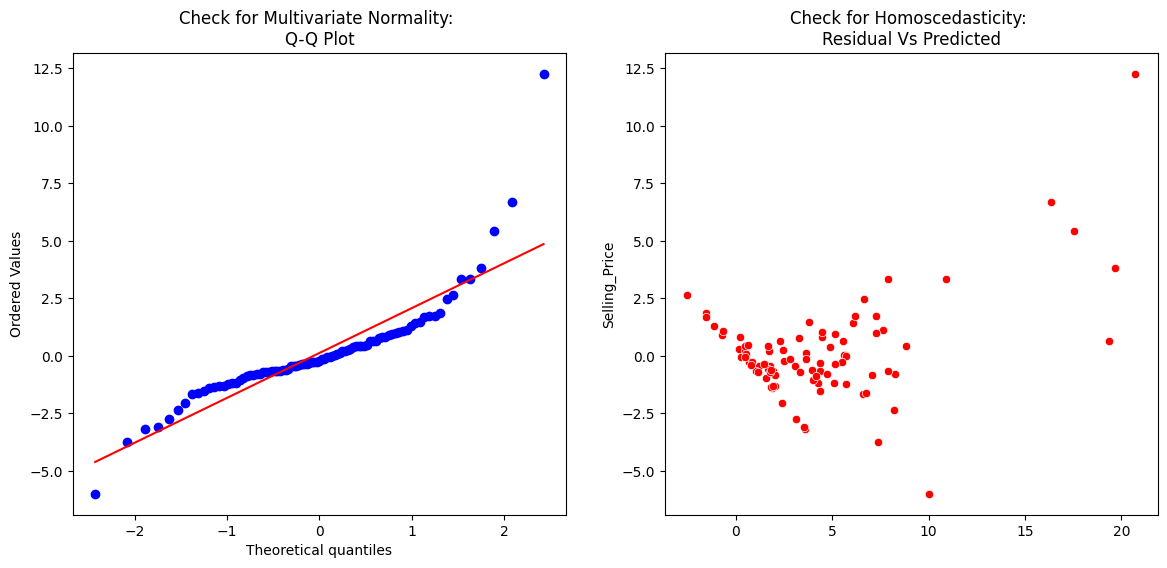

In [161]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');